In [1]:
#importing necessary packages and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [17]:
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
#loading the dataset
data = pd.read_csv(r'bank.csv',delimiter=';')

In [3]:
#viewing the data entries
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#getting the statistical distribution of numerical columns
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#extracting the column identifiers separated by numerical and categorical nature
num_columns = data.select_dtypes(exclude=object).columns
cat_column=data.select_dtypes(include=object).columns

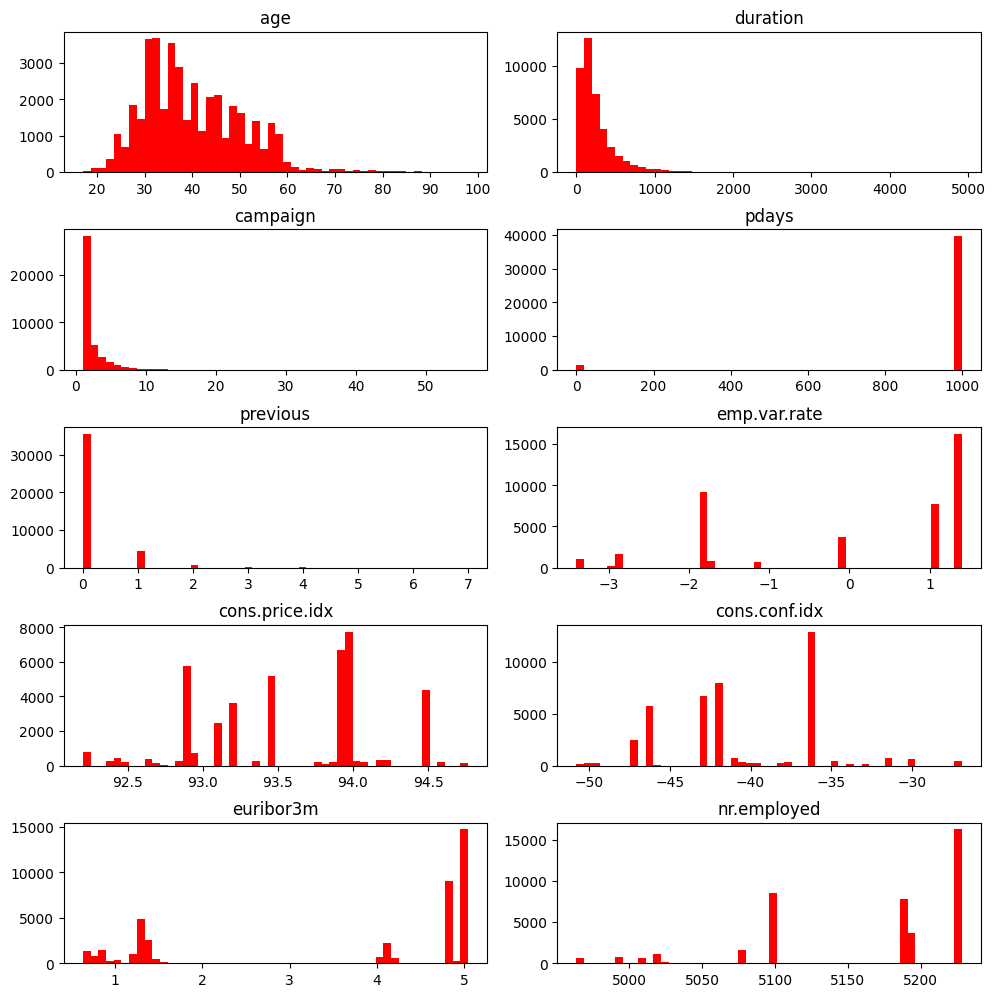

In [9]:
#Visualizing the distribution of numerical columns using historgram
plt.figure(figsize=(10,10))
for i in range(len(num_columns)):
    plt.subplot(5,2,i+1)
    plt.hist(data[num_columns[i]],color='red',bins=50)
    plt.title(num_columns[i])

plt.tight_layout(pad=0.8)
plt.show() 

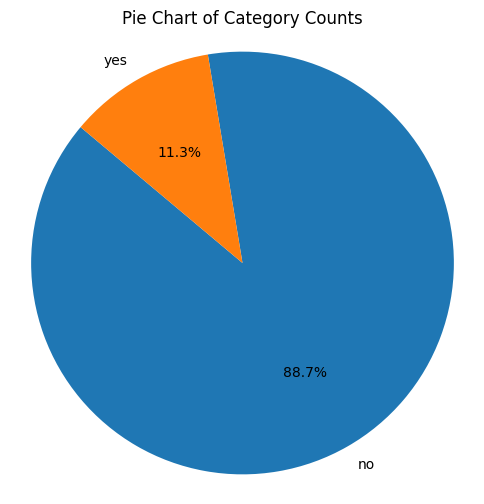

In [12]:
#analysing the target variable
target_var_count = data['y'].value_counts()

#pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_var_count, labels=target_var_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Category Counts')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()


The above pie chart tells us that there is a huge class imbalance in the target class. So we have to enforece necessary techniques to resolve the class imbalance problem in the final model

In [ ]:
value_counts = df['Category'].value_counts()
percentage_counts = value_counts / value_counts.sum() * 100

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=value_counts.index, y=value_counts.values)

# Add percentage labels above the bars
for p, label in zip(ax.patches, percentage_counts):
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2
    ax.annotate(f'{label:.1f}%', (width, height), ha='center')


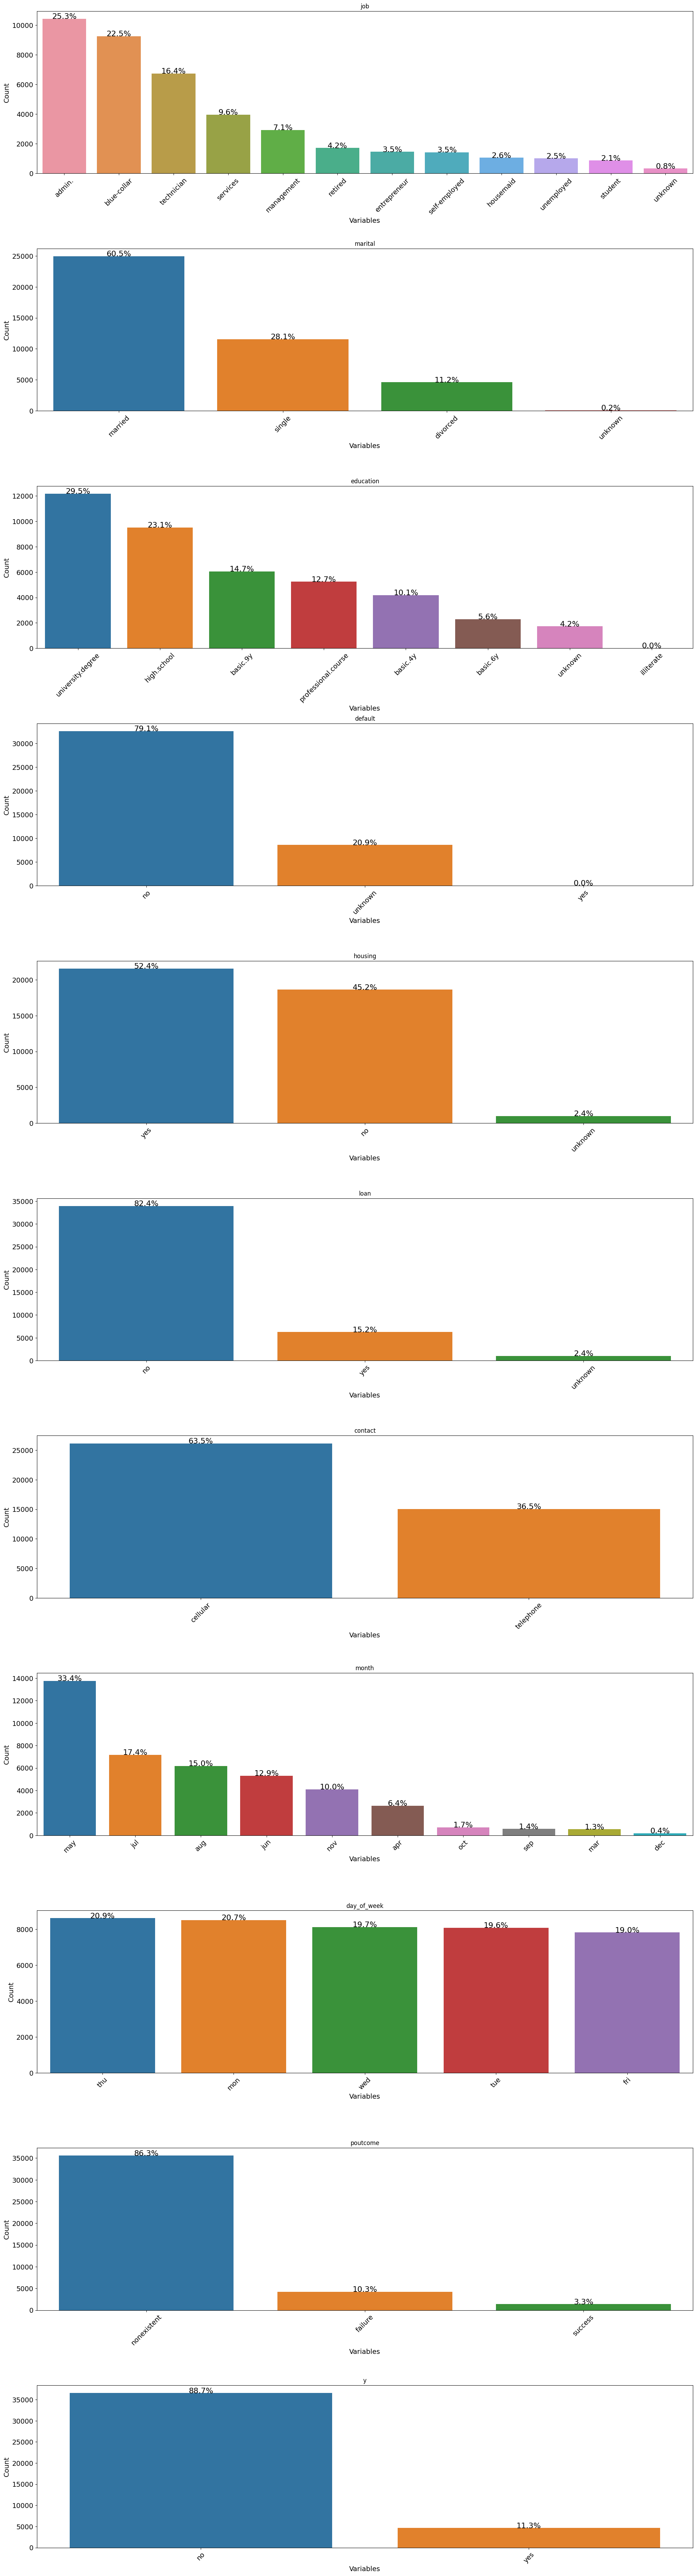

In [27]:
#Visualizing the distribution of numerical columns using historgram
plt.figure(figsize=(20,80))
for i in range(len(cat_column)):
    
    plt.subplot(12,1,i+1)
    value_counts=data[cat_column[i]].value_counts()
    percentage_counts = value_counts / value_counts.sum() * 100
    ax = sns.barplot(x=value_counts.index, y=value_counts.values,)
    for p, label in zip(ax.patches, percentage_counts):
        height = p.get_height()
        width = p.get_x() + p.get_width() / 2
        ax.annotate(f'{label:.1f}%', (width, height), ha='center',fontsize=16)
    plt.title(cat_column[i])
    plt.xlabel('Variables',fontsize=14)
    
    plt.xticks(rotation=45,fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Count',fontsize=14)

plt.tight_layout(pad=0.8)
plt.show()

In [30]:
for i in data.columns:
    if (data[i].isna().sum() != 0):
        print(i,":", data[i].isna().sum())

In [41]:
data = pd.read_csv('data.csv')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73096 entries, 0 to 73095
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73096 non-null  int64  
 1   age             73096 non-null  float64
 2   job             73096 non-null  float64
 3   marital         73096 non-null  float64
 4   education       73096 non-null  float64
 5   default         73096 non-null  float64
 6   housing         73096 non-null  float64
 7   loan            73096 non-null  float64
 8   contact         73096 non-null  float64
 9   month           73096 non-null  float64
 10  day_of_week     73096 non-null  float64
 11  duration        73096 non-null  float64
 12  campaign        73096 non-null  float64
 13  pdays           73096 non-null  float64
 14  previous        73096 non-null  float64
 15  poutcome        73096 non-null  float64
 16  emp.var.rate    73096 non-null  float64
 17  cons.price.idx  73096 non-null 

In [72]:
Y = data['y']
X = data.drop(labels=['duration','y','Unnamed: 0'],axis=1)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [79]:
model = XGBClassifier()

In [80]:
n_params={'xgbclassifier__n_estimators':[10,30,40,50,80,100,125,150,170,200,250,300]}

In [81]:
pp = make_pipeline(model)
gc = GridSearchCV(pp,n_params,cv = 5,scoring = ('roc_auc'),n_jobs=-1)
gc.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_con...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__n_estimators': [10, 30, 40, 50, 80,
                                                         100, 125, 150, 170,
                                                         200, 250, 300]},
             scoring='roc_auc')

In [82]:
gc.best_params_

{'xgbclassifier__n_estimators': 50}

In [83]:
gc.best_score_

0.9730760635493094

In [84]:
y_pred = gc.predict(X_test)

In [85]:
from sklearn.metrics import roc_auc_score,accuracy_score

In [86]:
roc_auc_score(Y_test,y_pred)

0.9384754542737936

In [87]:
accuracy_score(Y_test,y_pred)

0.9385772913816689